Trends:
1. New York Times is the only news source with negative aggregate compound score. 
2. Fox News's aggregate compound score is closest to zero - at least today, FOX does not live up to its reputation as the angriest news source!
3. CBS is the cheeriest news source today.
4. Of course these are just tweets and do not necessarily reflect the mode of the actual news in each of the news source.  

In [224]:
%matplotlib inline
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [225]:
# Function get the tweets for specified handle and return list of 100 latest tweets

def get_tweets(target_user):
    
    # Counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet {counter}: {tweet["text"]})

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Source Account": target_user,
                               "Tweet Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1
    
    return sentiments


In [226]:
def append_tweet_df(sentiments_pd, all_sentiments_pd):
    all_sentiments_pd = all_sentiments_pd.append(sentiments_pd)
    return all_sentiments_pd

In [227]:
# build the target user list
target_user_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

all_sentiments_pd = pd.DataFrame([])

# Get tweets from each item on the list and add to data frame of all tweets
for target_user in target_user_list:
    sentiments_pd = pd.DataFrame.from_dict(get_tweets(target_user))
    all_sentiments_pd = append_tweet_df(sentiments_pd, all_sentiments_pd)
    
all_sentiments_pd


,Compound,Date,Negative,Neutral,Positive,Source Account,Tweet Text,Tweets Ago
0,0.0000,Tue Oct 02 19:02:07 +0000 2018,1.000,0.000,0.000,@BBC,Discover the extraordinary story of how a smal...,1
1,-0.8020,Tue Oct 02 17:55:03 +0000 2018,0.573,0.427,0.000,@BBC,Knife crime is up 22%. Who are the victims and...,2
2,0.4019,Tue Oct 02 17:06:06 +0000 2018,0.803,0.000,0.197,@BBC,The gender reveal party that sparked a massive...,3
3,0.5574,Tue Oct 02 16:06:02 +0000 2018,0.816,0.000,0.184,@BBC,"In 2002, Iberian Lynx were the rarest cats in ...",4
4,-0.2732,Tue Oct 02 14:06:04 +0000 2018,0.554,0.242,0.204,@BBC,Two scientists who discovered how to fight can...,5
5,0.5994,Tue Oct 02 13:05:03 +0000 2018,0.795,0.000,0.205,@BBC,"🍲😋 A bowl of warm, hearty stew is always a wel...",6
6,0.0000,Tue Oct 02 12:05:04 +0000 2018,1.000,0.000,0.000,@BBC,Jodie Whittaker. New Doctor...and a 'Shat Lass...,7
7,0.5719,Tue Oct 02 10:47:27 +0000 2018,0.829,0.000,0.171,@BBC,Donna Strickland has become the first woman to...,8
8,0.0000,Tue Oct 02 10:27:17 +0000 2018,1.000,0.000,0.000,@BBC,RT @BBCSport: SPOTY is back - and there are so...,9
9,0.6696,Tue Oct 02 10:16:58 +0000 2018,0.728,0.000,0.272,@BBC,❤️💃🏻 Ballet is still the love of Joyce's life ...,10


In [228]:
# Export file as a CSV, without the Pandas index, but with the header
all_sentiments_pd.to_csv("NewsTweets.csv", index=True, header=True)

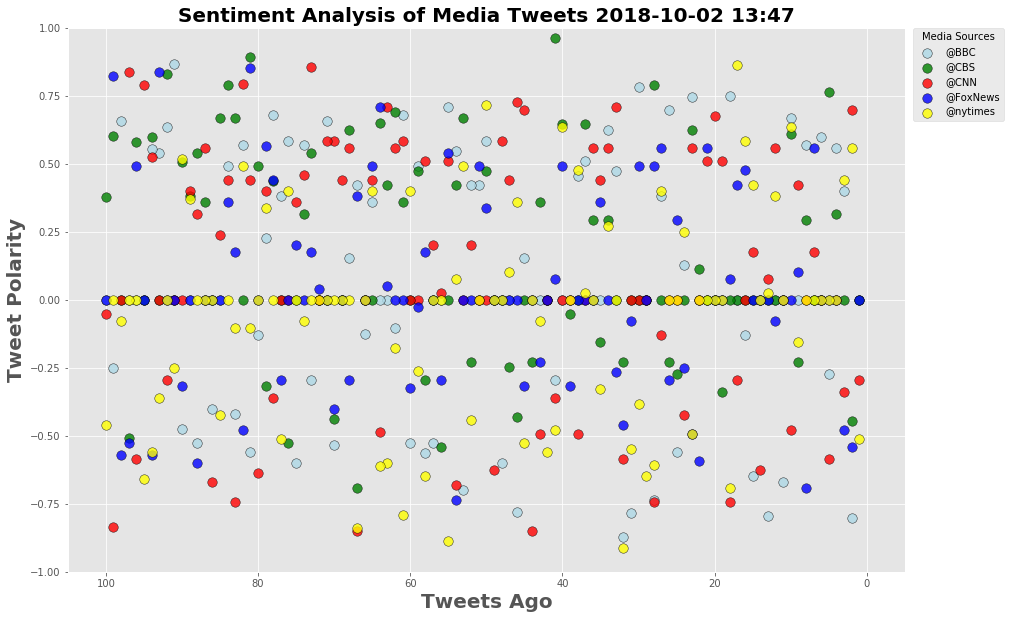

In [229]:
# Plot the scatter diagram

tweet_sources = all_sentiments_pd["Source Account"].unique()
colors = ["lightblue", "green", "red", "blue", "yellow"]

for i in range(len(tweet_sources)):
    x_axis = all_sentiments_pd[all_sentiments_pd["Source Account"] == tweet_sources[i]]["Tweets Ago"].values
    y_axis = all_sentiments_pd[all_sentiments_pd["Source Account"] == tweet_sources[i]]["Compound"].values
    
    plt.scatter(x_axis, y_axis, s = 90, c = colors[i], label = tweet_sources[i],
                alpha = .8, edgecolor = 'black', linewidth = .5)


now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.xlabel("Tweets Ago", fontsize=20, fontweight="bold")
plt.ylabel("Tweet Polarity", fontsize=20, fontweight="bold")
plt.title("Sentiment Analysis of Media Tweets " + now, fontsize=20, fontweight="bold")
plt.legend(title="Media Sources", bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.gcf().set_size_inches(15, 10)
plt.xlim(105, -5)
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets_Scatter_Plot.png")
plt.show()

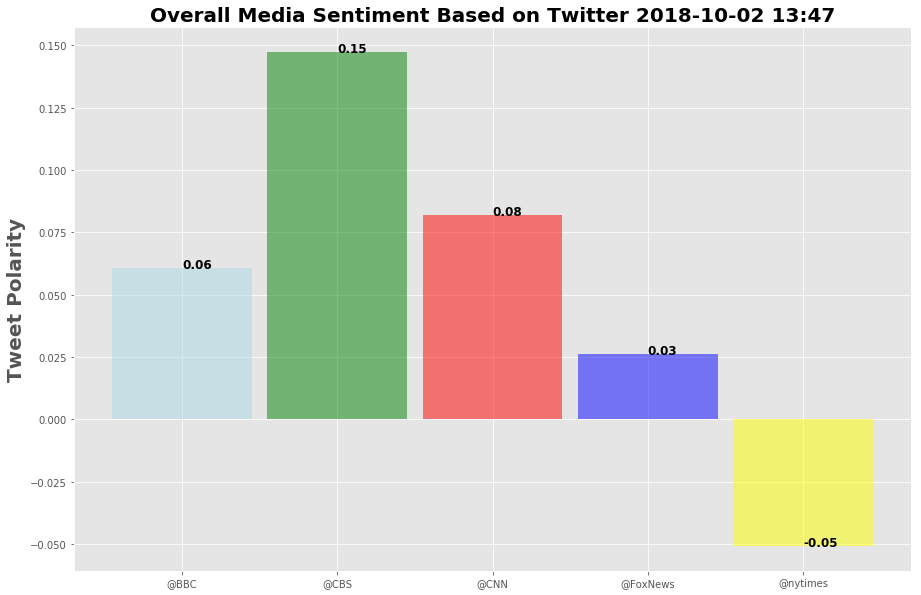

In [230]:
# plot Bar chart 

colors = ["lightblue", "green", "red", "blue", "yellow"]
plt.figure(figsize=(10, 7))
x_axis = target_user_list
y_axis = all_sentiments_pd.groupby(["Source Account"]).mean()["Compound"]

bar_graph = plt.bar(x_axis, y_axis, color = colors, alpha=0.5, align="center", width=0.9)

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.title("Overall Media Sentiment Based on Twitter " + now, fontsize=20, fontweight="bold")
plt.ylabel("Tweet Polarity", fontsize=20, fontweight="bold")
plt.grid(True)
plt.gcf().set_size_inches(15, 10)

# Add avg compound sentiment to eacg bar
for bar in bar_graph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, s=round(height, 2), size = 12, fontweight="bold")

plt.savefig("Sentiment_Analysis_Tweets_Bar_Plot.png")
plt.show()